In [892]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [814]:
df = pd.read_csv('data/ipo_stock_2010_2018.csv')

In [442]:
ipo_orign = pd.read_csv('data/ipo_2010_2018.csv')

## Checking and dealing with dtypes:

Converting to categorical can help improve memory usage and increase perfromance. Because algorithms now works not with strings, but with codes that are integers (see "Python for Data Analysis" book, Ch.12.1)

In [816]:
df['US_state'] = df['US_state'].astype('category')
df['sector'] = df['sector'].astype('category')
df['industry'] = df['industry'].astype('category')

In [826]:
df.sector.cat.categories

Index(['Basic Materials', 'Communication Services', 'Consumer Cyclical', 'Consumer Defensive', 'Energy', 'Financial Services', 'Healthcare', 'Industrials', 'Real Estate', 'Technology', 'Utilities'], dtype='object')

In [818]:
df.dtypes

Company Name         object  
Symbol               object  
Market               object  
Price                float64 
Shares               float64 
Offer Amount         float64 
Date Priced          object  
employees            float64 
address              object  
US_state             category
descriptions         object  
link_nasdaq          object  
year                 object  
firstday_adjclose    float64 
firstday_open        float64 
firstday_spread      float64 
firstday_volume      float64 
inmonth_adjclose     float64 
inmonth_open         float64 
inmonth_spread       float64 
inmonth_volume       float64 
inweek_adjclose      float64 
inweek_open          float64 
inweek_spread        float64 
inweek_volume        float64 
sector               category
industry             category
employees2019        float64 
CEO_pay              float64 
CEO_born             float64 
dtype: object

## Checking for duplicates:

In [438]:
print("number of rows in the dataset:", df.shape[0])
print("number of duplicates in the dataset:", df.duplicated().sum())

number of rows in the dataset: 1136
number of duplicates in the dataset: 0


In [439]:
df.drop_duplicates(keep='first', inplace=True)
print('num of rows after duplicates removal:', df.shape[0])
print("duplicates after removal:", df.duplicated().sum())

num of rows after duplicates removal: 1136
duplicates after removal: 0


## Checking missing values:

In [447]:
df.isna().sum()

Company Name         0  
Symbol               0  
Market               0  
Price                1  
Shares               0  
Offer Amount         0  
Date Priced          0  
employees            15 
address              3  
US_state             265
descriptions         0  
link_nasdaq          0  
year                 0  
firstday_adjclose    0  
firstday_open        0  
firstday_spread      0  
firstday_volume      0  
inmonth_adjclose     0  
inmonth_open         0  
inmonth_spread       0  
inmonth_volume       0  
inweek_adjclose      0  
inweek_open          0  
inweek_spread        0  
inweek_volume        0  
sector               22 
industry             22 
employees2019        114
CEO_pay              320
CEO_born             93 
dtype: int64

In [448]:
## TODO: clump values together for sector if pharma, bio etc
df[df['sector'].isna()]

,Company Name,Symbol,Market,Price,Shares,Offer Amount,Date Priced,employees,address,US_state,...,inmonth_volume,inweek_adjclose,inweek_open,inweek_spread,inweek_volume,sector,industry,employees2019,CEO_pay,CEO_born
59,COMPLETE GENOMICS INC,GNOM,NASDAQ,9.0,6000000,54000000,2010-11-11,167.0,"2071 STIERLIN COURTMOUNTAIN VIEW, CA 94043",CA,...,28859.0,7.840000,7.280000,1.173000,126118.0,NaN,NaN,NaN,NaN,NaN
92,ELLIE MAE INC,ELLI,American Stock Exchange,6.0,7500000,45000000,2011-04-15,190.0,"4420 ROSEWOOD DRIVE, SUITE 500PLEASANTON, CA 94588",CA,...,23700.0,7.220000,7.280000,0.120000,17500.0,NaN,NaN,NaN,NaN,NaN
119,"BSB BANCORP, INC.",BLMT,NASDAQ,10.0,7820000,78200000,2011-10-14,86.0,"2 LEONARD STREETBELMONT, MA 02478",MA,...,9800.0,10.320000,10.240000,0.110000,71500.0,NaN,NaN,NaN,NaN,NaN
271,"JONES ENERGY, INC.",JONE,New York Stock Exchange,15.0,12500000,187500000,2013-07-24,73.0,"807 LAS CIMAS PARKWAYSUITE 350AUSTIN, TX 78746",TX,...,208500.0,11.037055,14.170000,0.200000,178800.0,NaN,NaN,NaN,NaN,NaN
277,ONCOMED PHARMACEUTICALS INC,OMED,NASDAQ,17.0,4800000,81600000,2013-07-18,83.0,"800 CHESAPEAKE DRIVEREDWOOD CITY, CA 94063",CA,...,35500.0,20.990000,19.870001,1.599998,166000.0,NaN,NaN,NaN,NaN,NaN
294,"IVERIC BIO, INC.",OPHT,NASDAQ,22.0,7600000,167200000,2013-09-25,22.0,"ONE PENN PLAZA35TH FLOORNEW YORK, NY 10119",NY,...,253000.0,34.590000,33.930000,2.700001,293000.0,NaN,NaN,NaN,NaN,NaN
296,"DNIB UNWIND, INC.",BIND,NASDAQ,15.0,4700000,70500000,2013-09-20,50.0,"325 VASSAR STREETCAMBRIDGE, MA 02139",MA,...,13550.0,0.740000,0.740000,0.000000,0.0,NaN,NaN,NaN,NaN,NaN
393,"ACHAOGEN, INC.",AKAO,NASDAQ,12.0,6000000,72000000,2014-03-12,39.0,"1 TOWER PLACESUITE 300SOUTH SAN FRANCISCO, CA 94080",CA,...,68300.0,18.799999,18.600000,0.590000,104700.0,NaN,NaN,NaN,NaN,NaN
466,IMMUNE DESIGN CORP.,IMDZ,NASDAQ,12.0,5000000,60000000,2014-07-24,27.0,"1616 EASTLAKE AVENUE E.SUITE 310SEATTLE, WA 98102",WA,...,17600.0,11.860000,11.816000,0.179999,6800.0,NaN,NaN,NaN,NaN,NaN
522,EHI CAR SERVICES LTD,EHIC,New York Stock Exchange,12.0,10000000,120000000,2014-11-18,3331.0,"UNIT 12/F, BUILDING NO.5 GUOSHENG CENTER388 DADUHE ROADShanghai 200062",NaN,...,26100.0,12.000000,11.900000,0.429999,167600.0,NaN,NaN,NaN,NaN,NaN


# EDA 

### IPO (original dataset) by years 

2010    183
2011    165
2012    161
2013    249
2014    312
2015    200
2016    128
2017    210
2018    258
Name: year, dtype: int64

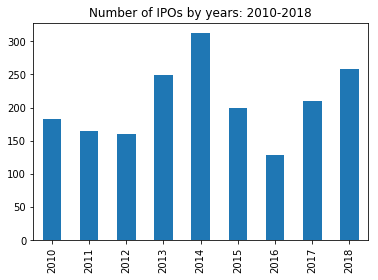

In [621]:
ipo_orign.year.value_counts(sort=False).plot.bar();
plt.title("Number of IPOs by years: 2010-2018");
ipo_orign.year.value_counts(sort=False)

#ipo_byyear = pd.DataFrame({'count' : ipo_orign.groupby(by='year')['year'].count()}).reset_index()

## Price offered: typical and outliers

In [445]:
#original dataset without cleaning
ipo_orign['Price'].describe()

count    1863.000000
mean     14.616683  
std      9.543341   
min      0.010000   
25%      10.000000  
50%      14.000000  
75%      18.000000  
max      165.900000 
Name: Price, dtype: float64

In [449]:
#dataset after cleaning
df['Price'].describe()

count    1135.000000
mean     15.141912  
std      8.246865   
min      2.850000   
25%      11.000000  
50%      15.000000  
75%      18.000000  
max      165.900000 
Name: Price, dtype: float64

Commentary: no difference between cleaned and original datasets in terms of typical price. The typical offered price is about 15 in range from 7 to 23. However, the cleaned dataset contains "healthier" companies as seen from the min price offered - 0.01 in the original dataset and 2.85 in the cleaned one.

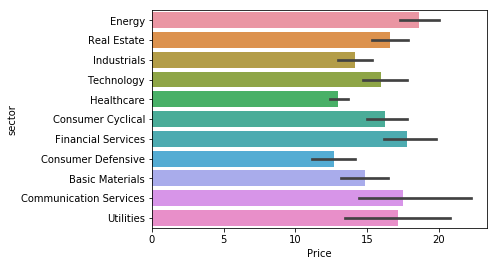

In [715]:
#bars = average value, black lines = 95% confidence interval
sns.barplot(x='Price', y='sector', data=df, orient='h');

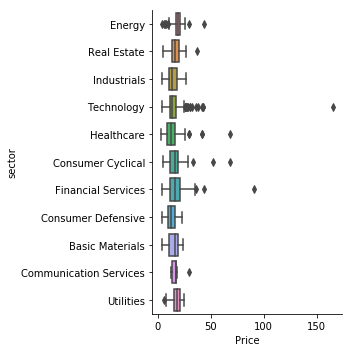

In [743]:
sns.catplot(x='Price', y ='sector', kind='box', data=df);

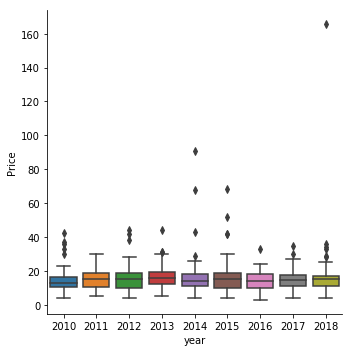

In [741]:
sns.catplot(x='year', y ='Price', kind='box', data=df);

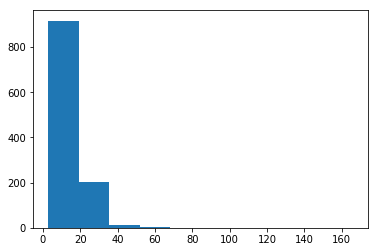

In [451]:
plt.hist(df['Price']);

### Outliers in terms of Price 

selecting all rows where the values of a certain column are higher than 3 standard deviations from the mean:

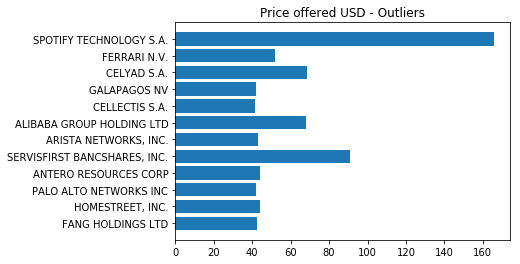

In [537]:
price_outliers = df[(df['Price']-df['Price'].mean()).abs() > 3*df['Price'].std()]
plt.barh(price_outliers['Company Name'], price_outliers['Price']);
plt.title("Price offered USD - Outliers");

### bin Price in quartiles and aggregate:

In [813]:
bins = pd.qcut(df.Price, 4, labels=['Q1', 'Q2', 'Q3', 'Q4'])  #qcut -> bins into quartiles if 4 or quantiles if 10
df.Price.groupby(bins).agg(['count', 'min', 'max']).reset_index()

,Price,count,min,max
0,Q1,322,2.85,11.0
1,Q2,327,11.25,15.0
2,Q3,218,15.50,18.0
3,Q4,268,18.50,165.9


## Offer amount: typical and outliers

In [454]:
df['Offer Amount'].describe()

count    1.136000e+03
mean     2.766513e+08
std      1.025954e+09
min      2.400000e+06
25%      6.000300e+07
50%      1.024400e+08
75%      2.213000e+08
max      2.176721e+10
Name: Offer Amount, dtype: float64

Commentary: typical offer amount to be raised on IPO - 100-250 mio USD. However, there are few unicorns like GM, FB and Alibaba that wanted to raise more than 10 billions USD through IPO. 

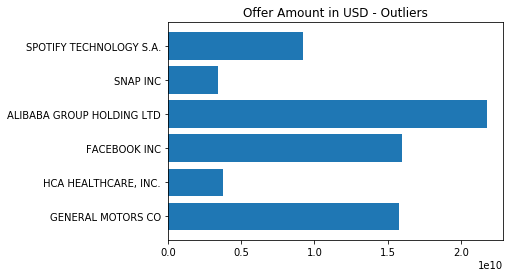

In [534]:
offer_outliers = df[(df['Offer Amount']-df['Offer Amount'].mean()).abs() > 3*df['Offer Amount'].std()]
plt.barh(offer_outliers['Company Name'], offer_outliers['Offer Amount']);
plt.title("Offer Amount in USD - Outliers");

## IPO numbers by the US states

In [849]:
bystate = df.US_state.value_counts()
bystate_pct = df.US_state.value_counts().div(df.US_state.value_counts().sum(0))*100
ipo_by_states = pd.DataFrame({'counts': bystate, 'pct': bystate_pct})
print(f"From {df.shape[0]} IPOs in this database, {bystate.sum()} companies or {round(bystate.sum()/df.shape[0]*100, 1)}% are in the US")

ipo_by_states.head(10)

From 1136 IPOs in this database, 871 companies or 76.7% are in the US


,counts,pct
CA,235,26.980482
MA,104,11.940299
TX,96,11.021814
NY,60,6.888634
PA,32,3.673938
NJ,29,3.329506
CO,25,2.870264
IL,22,2.525832
FL,20,2.296211
WA,19,2.181401


In [851]:
sanfrancisco = df[df['address'].str.contains("Francisco", na=False, case=False)]
bay_area = 'Saratoga|Menlo Park|Millbrae|San Carlos|San Bruno|Foster City|San Mateo|San Jose|Fremont|Redwood City|Mountain View|Palo Alto|Santa Clara|Cupertino|Los Altos|Los Gatos|Milpitas|Sunnyvale|Campbell'
bay_area_companies = df[df['address'].str.contains(bay_area, na=False, case=False)]
print(f"From {int(bystate.CA)} companies in California, {sanfrancisco.shape[0]} are in San Franscisco and {bay_area_companies.shape[0]} are in Bay area")

From 235 companies in California, 46 are in San Franscisco and 71 are in Bay area


Commentary: interesting IPOs in SF excluding healthcare - Dropbox (2018), Docusign (2018), Eventbrite (2018), Fitbit (2015), Lendingclub Corp (2014), Marin Software Inc (2013), New Relic Inc (2014), Okta (2017), Pattern Energy Group (2013), Stich Fix (2017), Pivotal Software (2018), Sunrun (2015), Square (2015), Splunk (2012), Atlassian Corp (2015), Yelp (2012), Zendesk (2014), Zynga (2011), Twitter (2013), Twilio (2016)

In [852]:
states_by_sector = pd.crosstab(df.US_state, df.sector)
states_by_sector_pct = states_by_sector.div(states_by_sector.sum(0), axis=1)
states_by_sector_pct.head(5)

sector,Basic Materials,Communication Services,Consumer Cyclical,Consumer Defensive,Energy,Financial Services,Healthcare,Industrials,Real Estate,Technology,Utilities
US_state,,,,,,,,,,,
AL,0.033333,0.000000,0.000000,0.000000,0.00000,0.011628,0.000000,0.018868,0.000000,0.000000,0.000000
AZ,0.033333,0.000000,0.024096,0.052632,0.00000,0.000000,0.010601,0.037736,0.032787,0.012195,0.166667
CA,0.066667,0.500000,0.156627,0.210526,0.00000,0.116279,0.346290,0.188679,0.131148,0.493902,0.333333
CO,0.066667,0.166667,0.024096,0.052632,0.09375,0.023256,0.007067,0.037736,0.065574,0.012195,0.000000
CT,0.000000,0.000000,0.036145,0.052632,0.00000,0.046512,0.014134,0.018868,0.032787,0.006098,0.000000


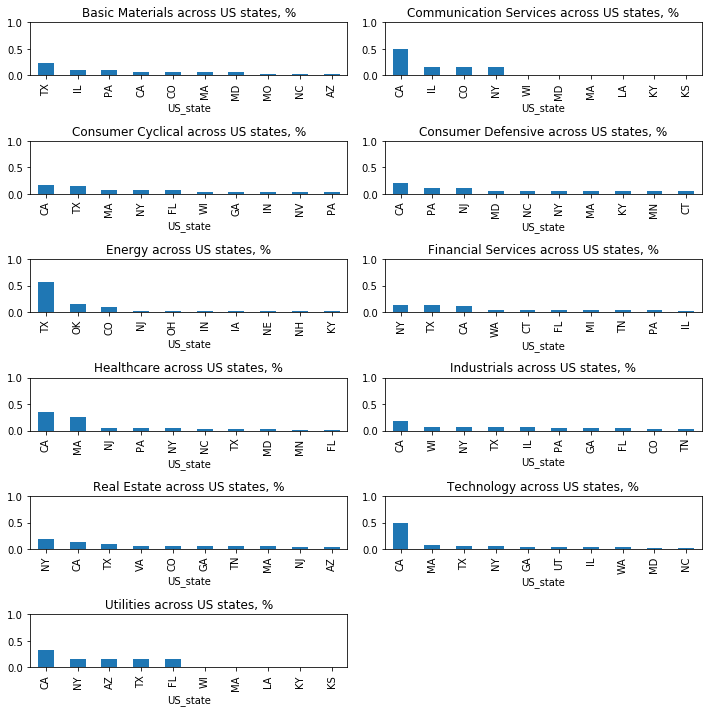

In [698]:
plt.figure(figsize=(10, 10));

for i, sector in enumerate(states_by_sector_pct.columns):
    plt.subplot(6,2,i+1)
    states_by_sector_pct[sector].sort_values(ascending=False).head(10).plot.bar();
    plt.ylim(0, 1)
    plt.title(f"{sector} across US states, %");
    plt.tight_layout();

## IPOs by sector and industry:

In [709]:
by_sector = pd.DataFrame(df.groupby('sector').size().sort_values(ascending=False), columns=['Number'])
by_sector['pct'] = 100*by_sector['Number']/df.shape[0]
by_sector

,Number,pct
sector,,
Healthcare,351,30.897887
Technology,227,19.982394
Consumer Cyclical,114,10.035211
Financial Services,112,9.859155
Industrials,77,6.778169
Energy,70,6.161972
Real Estate,64,5.633803
Basic Materials,42,3.697183
Consumer Defensive,39,3.433099


Summary: almost 50% of all IPOs between 2010 and 2018 were in Healthcare and Technology.

In [243]:
by_industry = pd.DataFrame(df.groupby('industry').size().sort_values(ascending=False), columns=['Number'])
by_industry.head(15)

,Number
industry,
Biotechnology,248
Software - Application,71
Internet Content & Information,47
Banks - Regional - US,46
Software - Infrastructure,41
Drug Manufacturers - Specialty & Generic,30
Medical Devices,28
Specialty Retail,26
Diagnostics & Research,25


## Employees: typical and outliers

There seems to be few outliers in terms of number of employees. These companies were probably mismanaged and became defunct like General Motors and so were enlisted as a new company on IPO again.

In [471]:
df['employees'].describe()

count    1121.000000  
mean     3107.493310  
std      16335.348701 
min      0.000000     
25%      44.000000    
50%      258.000000   
75%      1131.000000  
max      272000.000000
Name: employees, dtype: float64

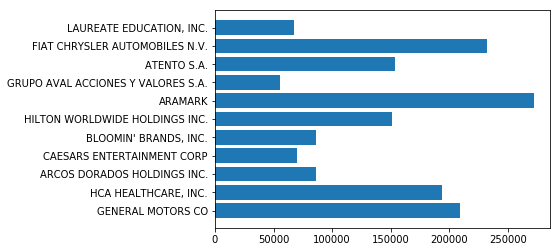

In [531]:
employees_outliers = df[(df['employees']-df['employees'].mean()).abs() > 3*df['employees'].std()]
plt.barh(employees_outliers['Company Name'], employees_outliers['employees']);

In [478]:
num_empl = 100000
by_employees = df[df['employees'] > num_empl].sort_values(by='employees')
print(f'there are {by_employees.shape[0]} companies that had more than {num_empl} employees when they went to IPO')

there are 6 companies that had more than 100000 employees when they went to IPO


**Commentary:** General Motors was bankrupt and became defunct in March 2011, the new company was listed in 2010:

"the bankrupt General Motors (was NYSE:GM) became Motoros Liquidation Corp (OTC:MTLQQ) and traded that way for almost 21 months before finally become defunct in March 2011 and returning shareholders $0. A new company (NYSE:GM) was listed in 2010. As far as previous shareholders were concerned, this is a completely new entity. Previous shareholders did not receive any shares in the new GM even though it appeared to have the same ticker."
https://money.stackexchange.com/questions/18723/how-to-find-historical-stock-price-for-a-de-listed-or-defunct-company

see also the story about CITIZENS FINANCIAL GROUP in Rhode Island. It used to be part of Royal Bank of Scotland (RBS) till 2014, when it went to IPO because RBS had to sell its overseas assets under pressure from public (RBS was nationalized after 2008 crisis). So Citizens is not a new company (it was actually founded in 1828) and it is also big ~18000 employees). 

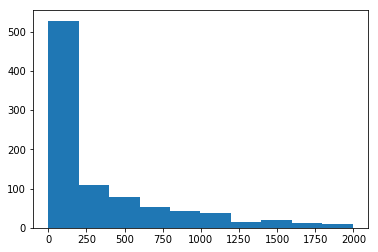

In [480]:
#zooming in distribution of employees in companies with less than 2000 employees
plt.hist(df['employees'][df['employees'] < 2000]);

In [889]:
dt_state_sector_employees = df[['US_state', 'sector', 'employees']]
dt_state_sector_employees = dt_state_sector_employees.set_index(['US_state', 'sector'])

In [896]:
#change to level='US_state' to see mean employees by states
dt_state_sector_employees.mean(level='sector')

,employees
sector,
Energy,704.484848
Real Estate,1426.475410
Industrials,6974.397260
Technology,1470.986726
Healthcare,769.267806
Consumer Cyclical,14469.052632
Financial Services,1716.169643
Consumer Defensive,6514.564103
Basic Materials,2760.250000


Commentary: the least number of employees are in three sectors - Utilities, Energy and Healthcare (under 800). The most labor intensive companies are in Consumer Cyclical, Industrials and Consumer Defensive (over 6000).

### Companies with the most & least employees growth:

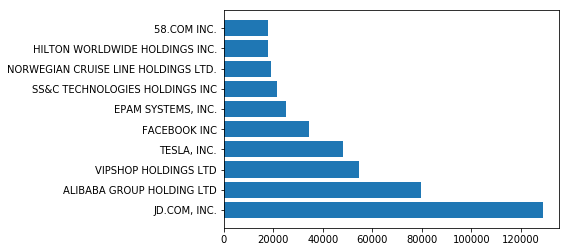

In [520]:
top10_fastgrowing = df.filter(items=(df['employees2019'] - df['employees']).sort_values(ascending=False).index, axis=0).head(10)
plt.barh(top10_fastgrowing['Company Name'], (top10_fastgrowing['employees2019'] - top10_fastgrowing['employees']));

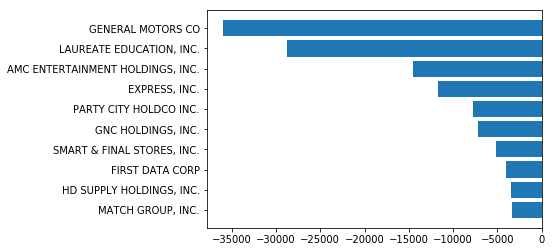

In [519]:
# Top10 of the worst growing companies
top10_shrinking = df.filter(items=(df['employees2019'] - df['employees']).sort_values(ascending=False).index, axis=0).dropna().tail(10)
plt.barh(top10_shrinking['Company Name'], (top10_shrinking['employees2019'] - top10_shrinking['employees']));

In [573]:
df[['Company Name', 'sector']][df['employees'].isna()]

,Company Name,sector
21,CHATHAM LODGING TRUST,Real Estate
63,COSTAMARE INC.,Industrials
99,PREFERRED APARTMENT COMMUNITIES INC,Real Estate
123,"ANGIE'S LIST, INC.",Technology
125,CHESAPEAKE ENERGY CORP,Energy
164,SANDRIDGE ENERGY INC,Energy
192,SEADRILL PARTNERS LLC,Energy
234,KNOT OFFSHORE PARTNERS LP,Industrials
245,EMERGE ENERGY SERVICES LP,Basic Materials
266,BROOKFIELD RENEWABLE ENERGY PARTNERS L.P.,Utilities


In [629]:
# sector of companies with 0 employees
# NOTE: some companies not included because sector is NaN. TODO: assign sectors where NaNs
df.sector[df['employees'] == 0].value_counts()
len(df[df['employees'] == 0])

56

## CEO pay and yearbon:

In [522]:
df['CEO_pay'].describe()

count    8.160000e+02
mean     1.232574e+06
std      1.346601e+06
min      1.240000e+03
25%      6.202800e+05
50%      8.835950e+05
75%      1.462500e+06
max      2.255000e+07
Name: CEO_pay, dtype: float64

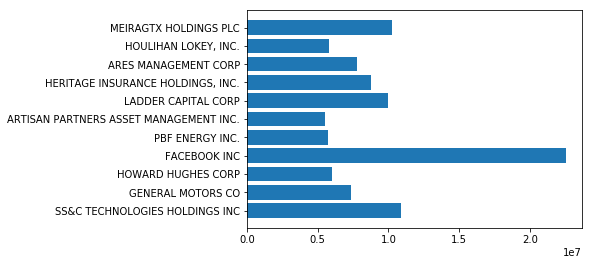

In [540]:
ceopay_outliers = df[(df['CEO_pay']-df['CEO_pay'].mean()).abs() > 3*df['CEO_pay'].std()]
plt.barh(ceopay_outliers['Company Name'], ceopay_outliers['CEO_pay']);

In [538]:
df['CEO_born'].describe()

count    1043.000000
mean     1964.539789
std      8.409796   
min      1931.000000
25%      1959.000000
50%      1964.000000
75%      1971.000000
max      1991.000000
Name: CEO_born, dtype: float64

In [547]:
ceoborn_outliers = df[(df['CEO_born']-df['CEO_born'].mean()).abs() > 3*df['CEO_born'].std()]
ceoborn_outliers[['Company Name', 'CEO_born']]

,Company Name,CEO_born
76,"AMERICAN ASSETS TRUST, INC.",1937.0
613,DAVIDSTEA INC.,1931.0
791,SNAP INC,1991.0


Commentary: the CEO of Snap is the youngest CEO of an IPO company in our dataset. He was born in 1991. While the oldest CEO was born in 1931 - Davidstea Inc. The majority of CEOs were born in the 1960s - 441 or 42% (441/1043).

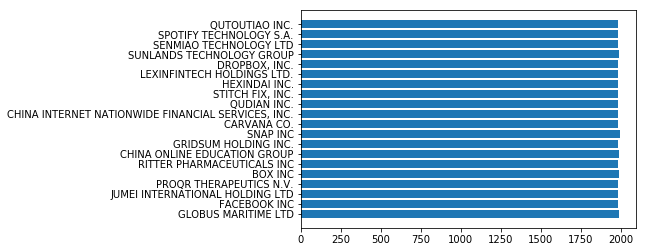

In [898]:
plt.barh(df['Company Name'][df['CEO_born'] > 1982], df['CEO_born'][df['CEO_born'] > 1982]);

In [613]:
df['CEO_pay'].corr(df['Offer Amount'])

0.5253765525130117

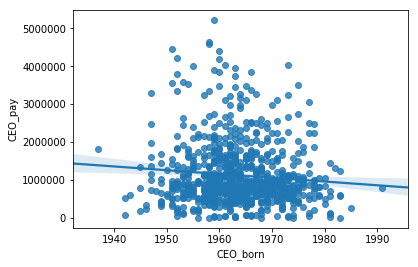

In [588]:
ceopay_nooutliers = df[~((df['CEO_pay']-df['CEO_pay'].mean()).abs() > 3*df['CEO_pay'].std())]
sns.regplot(ceopay_nooutliers['CEO_born'], ceopay_nooutliers['CEO_pay']);

In [595]:
bins = [1929,1940,1950,1960,1970,1980,1990,2000]
labels = ['1930s','1940s','1950s','1960s','1970s','1980s','1990s']
df['decade'] = pd.cut(df.CEO_born, bins, labels=labels)
print(df.groupby('decade',as_index=False).agg({'CEO_born': 'count', 'CEO_pay':'mean', 'Offer Amount': 'mean'}))

  decade  CEO_born       CEO_pay  Offer Amount
0  1930s  3         1.820000e+06  2.962167e+08
1  1940s  36        9.744397e+05  1.099817e+08
2  1950s  298       1.340836e+06  2.210074e+08
3  1960s  441       1.195902e+06  2.484266e+08
4  1970s  231       1.100024e+06  3.017576e+08
5  1980s  33        2.274247e+06  9.638824e+08
6  1990s  1         8.008500e+05  3.400000e+09


Commentary: the highest paying CEOs were born in the 1980s. Although they are relatively small group, they have a typical pay of 2.27 mio USD. They are also CEOs of the highest valued companies

/Users/kbosko/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


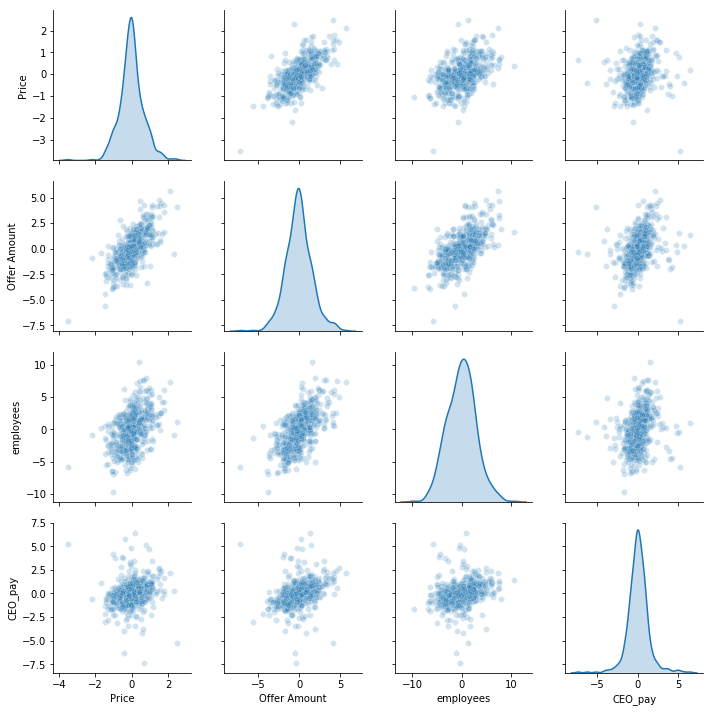

In [736]:
# div by zero - because there are companies with 0 employees
trans_df = np.log(df[['Price', 'Offer Amount', 'employees', 'CEO_pay']]).diff().dropna()
sns.pairplot(trans_df, diag_kind='kde', plot_kws={'alpha':0.2});

## Stock prices

more info on IPO market prediction: Combs, A. T. (2015): Python Machine Learning Blueprints.